## Time series with pandas

The most common data that you will have to analyse will be timeseries.

### Lot of data!

Example of sensors

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

df = pd.DataFrame()
files = os.listdir("data_sensors/")

for filename in files:
    if not "scan" in filename:
        continue
    df = df.append(pd.read_csv(os.path.join("data_sensors", filename), 
                               sep=" ", 
                               names=["rssi","uuid", "mayor", "minor","ts"]))
print(df.shape)
df.tail()

(23913, 5)


,rssi,uuid,mayor,minor,ts
cc:ef:c2:55:9a:8b,-60,abababab-4fa2-4e98-8024-bc5b71e08943,0,1,1.583552e+12
f5:44:a2:3e:97:84,-97,abababab-4fa2-4e98-8024-bc5b71e08943,0,3,1.583552e+12
cc:ef:c2:55:9a:8b,-52,abababab-4fa2-4e98-8024-bc5b71e08943,0,1,1.583552e+12
cc:ef:c2:55:9a:8b,-51,abababab-4fa2-4e98-8024-bc5b71e08943,0,1,1.583552e+12
cc:ef:c2:55:9a:8b,-71,abababab-4fa2-4e98-8024-bc5b71e08943,0,1,1.583552e+12


We will use only the RSSI value (sensor data), the minor value and the timestamp (ts)

In [2]:
data = df.loc[:,("rssi", "minor", "ts")]
data = data

**Exercise 1**
Convert create a column callled **date** with the date of each element of the dataframe

In [3]:
data.loc[:,'date'] = pd.to_datetime(data.ts, unit="ms")
data.tail()

,rssi,minor,ts,date
cc:ef:c2:55:9a:8b,-60,1,1.583552e+12,2020-03-07 03:26:47.168117432
f5:44:a2:3e:97:84,-97,3,1.583552e+12,2020-03-07 03:26:48.937756836
cc:ef:c2:55:9a:8b,-52,1,1.583552e+12,2020-03-07 03:26:49.150560791
cc:ef:c2:55:9a:8b,-51,1,1.583552e+12,2020-03-07 03:26:51.170314453
cc:ef:c2:55:9a:8b,-71,1,1.583552e+12,2020-03-07 03:26:53.168655518


Plot the data

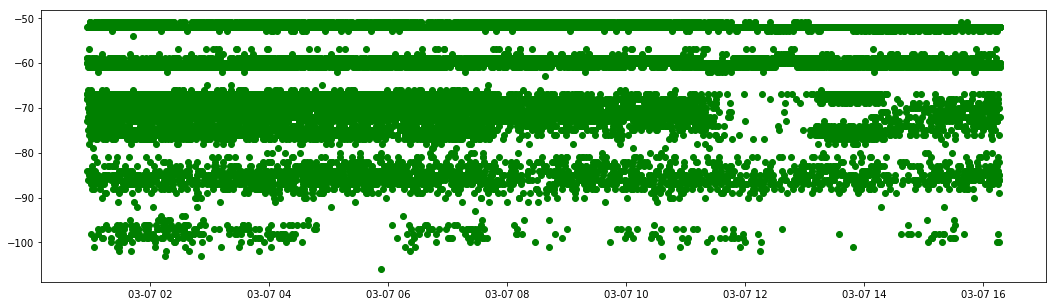

In [4]:
# To avoid warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(18,5))
plt.plot(data.date,data.rssi, 'go')

**Exercise 2** Separate data per sensor

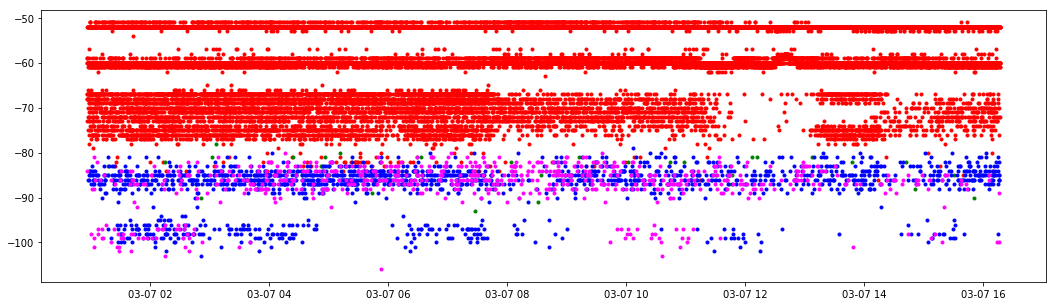

In [5]:
data_g = data.groupby("minor")
plt.figure(figsize=(18,5))

colors = ["red", "green", "blue", "magenta"]

for i,group in data_g:   
    plt.plot(group.date,group.rssi,'.', color=colors[i-1])


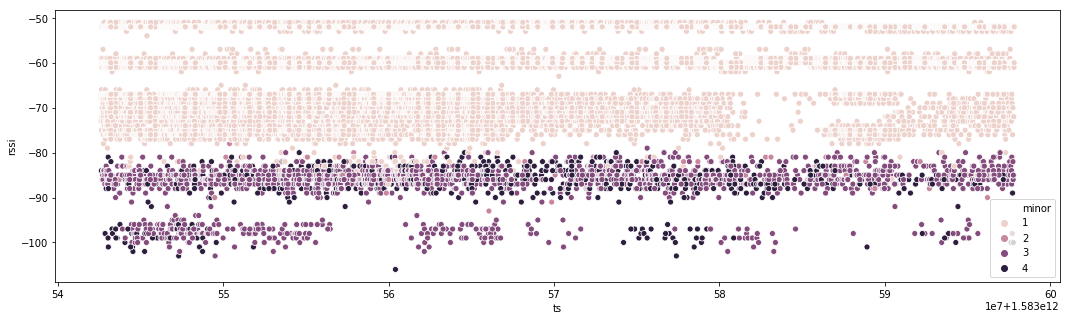

In [6]:
import seaborn as sns
plt.figure(figsize=(18,5))
sns.scatterplot(x="ts", y="rssi", data=data, hue="minor")

**Exercise 3** Resample data to get a point every 5 minutes per sensor

In [17]:
data_indexed = data.set_index("date")
data_g = data_indexed.groupby("minor")

def change_period(data_sensor):
    result = data_sensor.resample("5T").mean()
    return result
    
data_final = data_g.apply(change_period)
data_final

rssi  minor            ts
minor date                                               
1     2020-03-07 00:30:00 -64.104478    1.0  1.583543e+12
      2020-03-07 01:00:00 -62.885671    1.0  1.583544e+12
      2020-03-07 01:30:00 -63.206117    1.0  1.583546e+12
      2020-03-07 02:00:00 -63.800522    1.0  1.583547e+12
      2020-03-07 02:30:00 -63.087696    1.0  1.583549e+12
...                              ...    ...           ...
4     2020-03-07 14:00:00 -86.857143    4.0  1.583591e+12
      2020-03-07 14:30:00 -87.454545    4.0  1.583592e+12
      2020-03-07 15:00:00 -90.500000    4.0  1.583594e+12
      2020-03-07 15:30:00 -87.000000    4.0  1.583596e+12
      2020-03-07 16:00:00 -92.000000    4.0  1.583597e+12

[127 rows x 3 columns]

In [18]:
data_final = data_final.dropna()

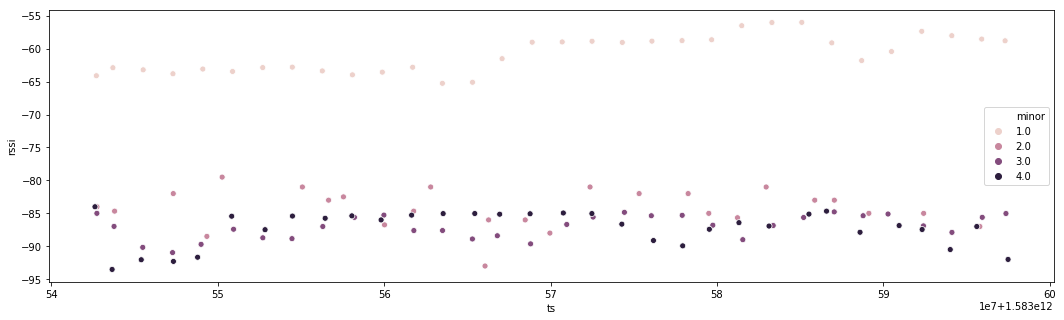

In [19]:
plt.figure(figsize=(18,5))
sns.scatterplot(x="ts", y="rssi", data=data_final, hue="minor")

In [10]:
data_indexed = data.set_index("date")
data_g = data_indexed.groupby("minor")

def my_function(data):
    if data.empty:
        return np.nan
    return data.max() if data.max()>-70 else -100

def change_period(data_sensor):
    result = data_sensor.resample("5T").apply(my_function)
    return result
    
data_final = data_g.apply(change_period)
data_final

rssi  minor            ts
minor date                                           
1     2020-03-07 00:55:00  -51.0    1.0  1.583543e+12
      2020-03-07 01:00:00  -51.0    1.0  1.583543e+12
      2020-03-07 01:05:00  -51.0    1.0  1.583543e+12
      2020-03-07 01:10:00  -51.0    1.0  1.583544e+12
      2020-03-07 01:15:00  -51.0    1.0  1.583544e+12
...                          ...    ...           ...
4     2020-03-07 15:55:00    NaN    NaN           NaN
      2020-03-07 16:00:00    NaN    NaN           NaN
      2020-03-07 16:05:00 -100.0    4.0  1.583597e+12
      2020-03-07 16:10:00 -100.0    4.0  1.583598e+12
      2020-03-07 16:15:00 -100.0    4.0  1.583598e+12

[735 rows x 3 columns]

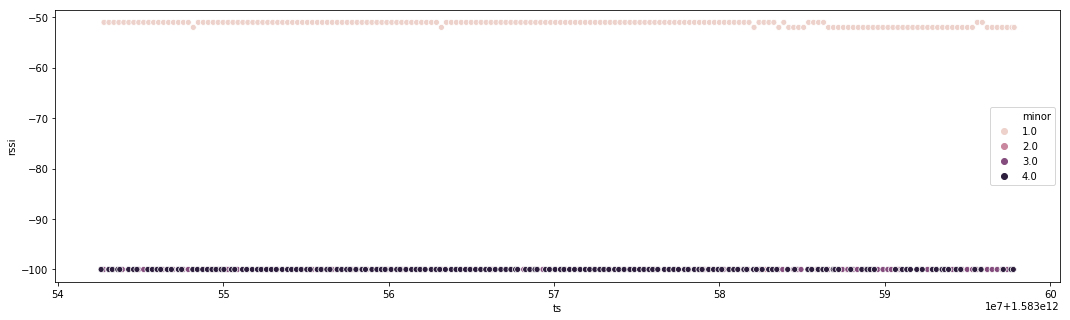

In [11]:
plt.figure(figsize=(18,5))
sns.scatterplot(x="ts", y="rssi", data=data_final, hue="minor")

**Exercise 4** From the original data (not resampled), create a set of observations per sensor. We consider that for consecutive observations there is no more than 20 seconds between two observations.

Merge all the observations (less than 20 seconds between observations) and keep the initial time and the end time of the observation

In [12]:
data_g = data.groupby("minor")

def build_intervals(data):
    """
    """
    data["old_date"] = data["date"].shift()
    data["interval"]=(data.date - data.old_date).dt.total_seconds().gt(20).cumsum()
    intervals = data.groupby("interval").agg({"ts": ["min", "max"], "rssi": "mean"})
    return intervals

result = data_g.apply(build_intervals)
result["duration"] = (result["ts"]["max"]-result["ts"]["min"])//1000
result

ts                     rssi duration
                         min           max       mean         
minor interval                                                
1     0         1.583545e+12  1.583590e+12 -62.820276  44711.0
      1         1.583548e+12  1.583558e+12 -63.721774   9900.0
      2         1.583544e+12  1.583593e+12 -60.155280  49213.0
      3         1.583559e+12  1.583589e+12 -61.700581  30306.0
      4         1.583580e+12  1.583587e+12 -59.349515   7199.0
...                      ...           ...        ...      ...
4     461       1.583559e+12  1.583595e+12 -85.666667  36471.0
      462       1.583559e+12  1.583559e+12 -84.000000      0.0
      463       1.583547e+12  1.583595e+12 -84.500000  47101.0
      464       1.583551e+12  1.583551e+12 -85.000000      0.0
      465       1.583552e+12  1.583552e+12 -86.000000      0.0

[1439 rows x 4 columns]